29/07/2011
[31.78       31.8125     31.8875     31.9        31.9        31.9875
 32.         32.0875     32.1        32.1625     32.2        32.2
 32.2        32.2        32.2        32.2        32.2        32.2
 32.225      32.3        32.3        32.3625     32.4        32.4
 32.4        32.6        32.6125     32.7        32.6375     32.6625
 32.7        32.7        32.7        31.         32.34285714 32.7875
 32.7625     32.75       32.75       32.8        32.8        32.8
 32.8        32.85       32.9       ]
[ 0.04562873 -0.46499574 -0.40794209 -0.43588844 -0.4713348  -0.68178115
 -0.5797275  -0.55267385 -0.55419164 -0.64856656 -0.67151291 -0.69445926
 -0.71740562 -0.76329832 -0.78624467 -0.82169103 -0.91963738 -1.03508373
 -1.12803008 -1.20097644 -1.22392279 -1.12186914 -0.98410121 -1.07276185
 -1.2032082  -1.33865455 -1.4241009  -1.68454726 -1.65749361 -1.73043996
 -1.75338631 -1.78883267 -1.81177902 -1.92222537 -1.94517172 -1.89311808
 -1.89106443 -1.91401078 -1.93695713 -1.95

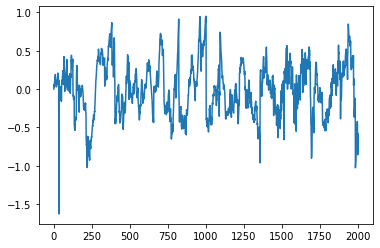

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
def modlin(x,a,b):
    return a*x+b
from numba import jit


l=pd.read_csv('dataT.csv',sep='!')
for k in l:
    Values=np.float64(np.array([l[k][i][:2]+'.'+l[k][i][3:] for i in range(len(l[k]))]))
    
l=pd.read_csv('dates_T.csv',sep='!')
for k in l:
    print(l[k][1])
    Dates=np.array([np.datetime64(l[k][i][6:]+'-'+l[k][i][3:5]+'-'+l[k][i][:2]) for i in range(1,len(l[k]))])
t0=Dates[0]
Dates=Dates-t0
Dates=np.int64(Dates)


T_mM=['2011-09-16','2012-02-14','2012-08-25','2013-03-22','2013-09-11','2014-03-24','2014-09-22','2015-02-27','2015-09-05','2016-03-11','2016-09-19','2017-02-03','2017-08-30']

T_mM_0=[0]+[np.int64(np.datetime64(t)-t0) for t in T_mM]+[max(Dates)]
b=Values[0]

Indices=[np.where(t==Dates)[0][0] for t in T_mM_0]

for k in range(len(T_mM_0)-1):
     def modlin(x,a):
        return a*x+b
     x,y=Dates[Indices[k]:Indices[k+1]]-T_mM_0[k],Values[Indices[k]:Indices[k+1]]
     print(y)
     sol=curve_fit(modlin,x,y)
     a=sol[0]
     Values[Indices[k]:]-=modlin(Dates[Indices[k]:]-T_mM_0[k],a)
     b=Values[Indices[k+1]-1] 

plt.plot(Values)
plt.show()

# (b)

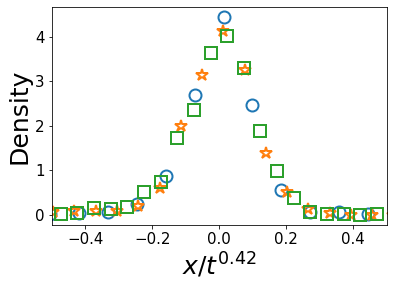

In [2]:
from scipy.stats import norm
i=0
Marker=['o','*','s','p']

for t in [5,10,20]:
    X=[]
    for ini in range(0,len(Values)-t):
        x0=Values[ini]
        X.append(Values[ini+t]-x0)
    h,bins=np.histogram(np.array(X)/t**0.42,density=True,bins=20)
    bins=(bins[1:]+bins[:-1])/2
    plt.plot(bins,h,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    i+=1
Xl=np.linspace(-10,10,1000)
plt.xlim(-0.5,0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$x/t^{0.42}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
#plt.savefig('Temp_Volcano.svg')
plt.show()    

# (b')

188
1002


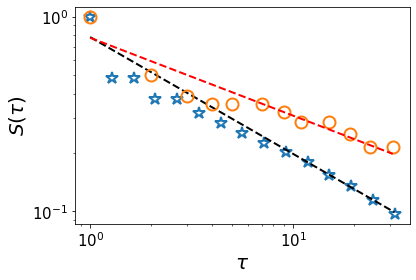

In [4]:
H=0.4

@jit(nopython=True)
def tau(V):
    tau=0
    M=V[0]
    while tau<len(V) and V[tau]<=M:
        tau+=1
    return tau

##
T=[]
T0=np.logspace(0,1.5,15)
C=np.zeros(len(T0))
F=np.zeros(len(T0))

for k in range(0,len(Values)-200):
    t=tau(Values[k:])
    C[T0<=(len(Values)-k)]+=1
    F[T0<=t]+=1

F/=C
##
from numba import jit
@jit(nopython=True)
def tau(V):
    T=[]
    M=V[0]
    tau=1
    for k in range(1,len(V)-1):
        if V[k]>M:
            T.append(tau)
            tau=1
        else:
            tau+=1
        M=max(V[k],M)
    return T

T=[]

for k in range(len(Indices)-1):
  T+=list(tau(Values[Indices[k]:Indices[k+1]]))
print(len(T))

T=[]
epochs=2
print(len(Values)//epochs)
for k in range(0,len(Values),len(Values)//epochs):
  T+=tau(Values[k:k+len(Values)//epochs])[1:]

@jit(nopython=True)
def FreCum(T,Tl):
    S=[]
    for t in Tl:
        S.append(np.sum(T>=t)/len(T))
    return S

##
Tl=np.unique(np.int64(np.logspace(0,1.5,15)))
Tl=np.float64(Tl)

dw=1/H
i=0
Marker=['*','o','s','p']


plt.plot(T0,F,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
plt.plot(T0,(T0/T0[10])**(-1+H)*F[10],'--k',linewidth=2)
i+=1


S=np.array(FreCum(np.array(T),Tl))



plt.plot(Tl[:],S[:],Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0) 

plt.plot(Tl,(Tl/Tl[5])**(-H)*S[5],'--r',linewidth=2)




plt.xlabel(r'$\tau$',fontsize=20)
plt.ylabel(r'$S(\tau)$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.semilogx()
plt.semilogy()

#plt.savefig('Records_Temp_Volcano.svg')
